In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



In [3]:
data = pd.read_csv("final_florida_df.csv")
# data["number_bans"] = data["number_bans"].fillna(0)

data.columns

Index(['Unnamed: 0', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'banned_books',
       'LEA_ENR', 'SCH_FTETEACH_TOT', 'SATACT_P', 'APENR_P', 'P_EXPULSIONS',
       'TOT_DIS_HB', 'TOT_RAC_HB', 'TOT_SEX_HB', 'NMCNTY',
       'Median Household Income', 'PVI_parsed', 'County Name',
       'Catholic Church', 'Non-Religious',
       'Non-denominational Christian Churches', 'Southern Baptist Convention',
       'United Methodist Church'],
      dtype='object')

In [10]:
# model = LogisticRegression()

logit_vars = ['LEA_ENR', 'SCH_FTETEACH_TOT', 'SATACT_P', 'APENR_P', 'P_EXPULSIONS', 'Median Household Income', 
              'PVI_parsed', "banned_books", 'Catholic Church', 'Non-Religious',
       'Non-denominational Christian Churches', 'Southern Baptist Convention',
       'United Methodist Church']
cleaned_data = data[logit_vars].dropna()
X = cleaned_data[['LEA_ENR', 'SCH_FTETEACH_TOT', 'SATACT_P', 'APENR_P', 'P_EXPULSIONS', 
                  'Median Household Income', 'PVI_parsed', 'Catholic Church', 'Non-Religious',
       'Non-denominational Christian Churches', 'Southern Baptist Convention',
       'United Methodist Church']]
y = cleaned_data["banned_books"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)


model = sm.Logit(y, X_train_scaled)

# Fit the model
result = model.fit_regularized()

# Display the summary
print(result.summary(xname=X.columns.tolist()))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45357239574857483
            Iterations: 51
            Function evaluations: 51
            Gradient evaluations: 51
                           Logit Regression Results                           
Dep. Variable:           banned_books   No. Observations:                   64
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.3055
Time:                        21:53:38   Log-Likelihood:                -29.029
converged:                       True   LL-Null:                       -41.796
Covariance Type:            nonrobust   LLR p-value:                  0.007609
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [28]:
model = LinearRegression()


dat = data.loc[data["number_bans"] > 0]
dat = dat[["number_bans", "LEA_ENR"]]
dat = dat.dropna()


X = dat[["LEA_ENR"]]
y = dat[["number_bans"]]

model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
r2

0.049898095787311525

R-squared: 0.049898095787311525


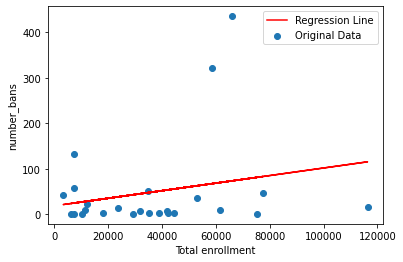

In [35]:
model = LinearRegression()

dat = data.loc[data["number_bans"] > 0]
# dat = dat.loc[data["number_bans"] < 200]
dat = dat[["number_bans", "LEA_ENR"]]
dat = dat.dropna()

X = dat[["LEA_ENR"]]
y = dat[["number_bans"]]

model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

plt.scatter(X["LEA_ENR"], y["number_bans"], label='Original Data')
plt.plot(X["LEA_ENR"], y_pred, 'r-', label='Regression Line')
plt.xlabel('Total enrollment')
plt.ylabel('number_bans')
plt.legend()
plt.show()